# ИУ5-65Б Коныгина Д.А.
# РК1 ТМО Вариант 9

## Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
+для набора данных построить "парные диаграммы".

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris
%matplotlib inline 
sns.set(style="ticks")

In [2]:
iris = load_iris()

In [3]:
# Наименования признаков
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Размер выборки
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [6]:
# Сформируем DataFrame
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [7]:
# И выведем его статистические характеристики
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [13]:
# тк в датасете нет категориальных признаков, то сделаем целевой признак target категорией
target_map = {0: 'zero', 1: 'one', 2: 'two'}
iris_df['target'] = iris_df['target'].map(target_map)

In [14]:
iris_df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,zero
1,4.9,3.0,1.4,0.2,zero
2,4.7,3.2,1.3,0.2,zero
3,4.6,3.1,1.5,0.2,zero
4,5.0,3.6,1.4,0.2,zero
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,two
146,6.3,2.5,5.0,1.9,two
147,6.5,3.0,5.2,2.0,two
148,6.2,3.4,5.4,2.3,two


In [15]:
# посчитаем количество  пропущенных значений для признаков
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [16]:
# Рандомно выберем 15 индексов для признака "target" и присвоим им значения NaN
target_na_indices = np.random.choice(iris_df.index, 15, replace=False)
iris_df.loc[target_na_indices, 'target'] = np.nan

# Рандомно выберем 20 индексов для признака "sepal width (cm)" и присвоим им значения NaN
sepal_width_na_indices = np.random.choice(iris_df.index, 20, replace=False)
iris_df.loc[sepal_width_na_indices, 'sepal width (cm)'] = np.nan

In [17]:
# посчитаем количество  пропущенных значений для признаков
iris_df.isna().sum()

sepal length (cm)     0
sepal width (cm)     20
petal length (cm)     0
petal width (cm)      0
target               15
dtype: int64

## Обработка пропусков числовых данных

In [19]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = iris_df.shape[0]
print('Всего строк: {}'.format(total_count))

num_cols = []
for col in iris_df.columns:
    # Количество пустых значений 
    temp_null_count = iris_df[iris_df[col].isna()].shape[0]
    dt = str(iris_df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Всего строк: 150
Колонка sepal width (cm). Тип данных float64. Количество пустых значений 20, 13.33%.


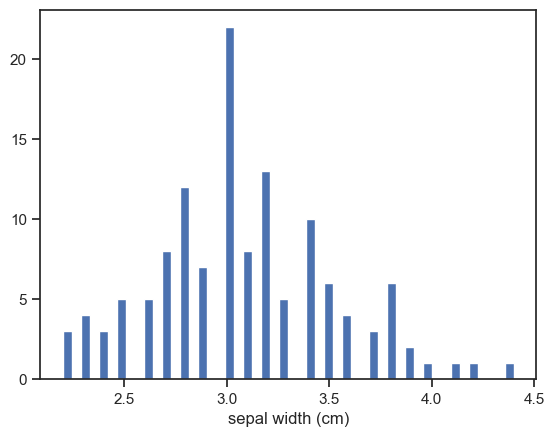

In [21]:
# Фильтр по колонкам с пропущенными значениями
data_num = iris_df[num_cols]
# Гистограмма по признакам
for col in data_num:
    plt.hist(iris_df[col], 50)
    plt.xlabel(col)
    plt.show()

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator


data_num_sw = data_num[['sepal width (cm)']]
data_num_sw.head()

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_sw)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [31]:
# в предыдущем пунтке видим, что например, 10ое значение должно быть заполнено


# для импьютации пропущенных данных будем использовать медианный метод, 
# чтобы учесть разброс в данных от очень больших значений до очень маленьких
data_num_sw['sepal width (cm)'] = data_num_sw['sepal width (cm)'].fillna(data_num_sw['sepal width (cm)'].median())
data_num_sw.head(13)

,sepal width (cm)
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
5,3.9
6,3.4
7,3.4
8,2.9
9,3.0


## Обработка пропусков категориальных данных

In [32]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in iris_df.columns:
    # Количество пустых значений 
    temp_null_count = iris_df[iris_df[col].isna()].shape[0]
    dt = str(iris_df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка target. Тип данных object. Количество пустых значений 15, 10.0%.


In [33]:
cat_temp_data = iris_df[['target']]
cat_temp_data.head()

,target
0,NaN
1,NaN
2,zero
3,zero
4,zero


In [34]:
cat_temp_data['target'].unique()

array([nan, 'zero', 'one', 'two'], dtype=object)

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".
можно выбрать в качестве константы "None", но в данном датасете лучше, чтобы было какое-то определенное значение, поэтому выберем стратегию "наиболее встречаемый" ("most_frequent")

In [35]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['one'],
       ['one'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['one'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['one'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['one'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['one'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['zero'],
       ['one'],
       ['one'],
       ['one'],
       ['one'],
       ['one'],
       ['one'],
       ['one'],
       ['one'],
       ['one'],
       ['one

Видим, что произошла замена пропущенных значений (напр, 1ое и 2ое)

## Парные диаграммы

C:\Users\dasha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


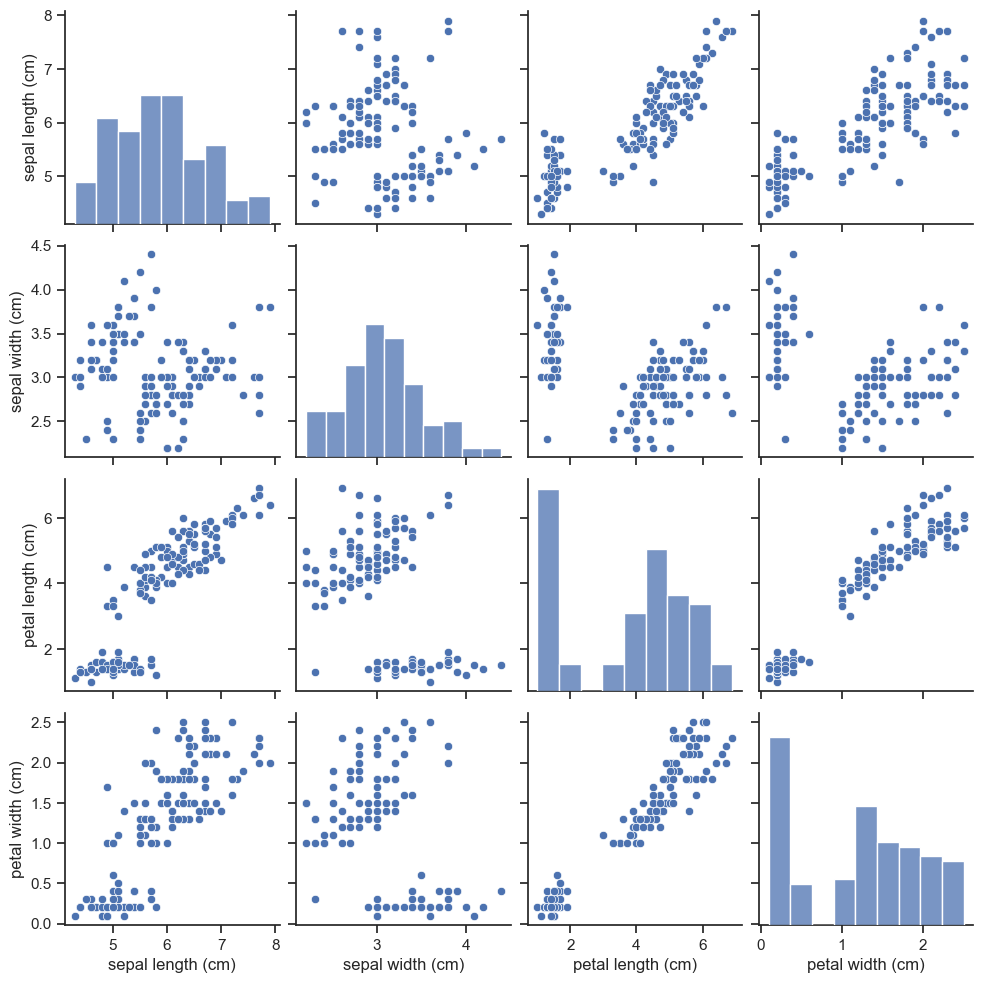

In [36]:
sns.pairplot(iris_df)

C:\Users\dasha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


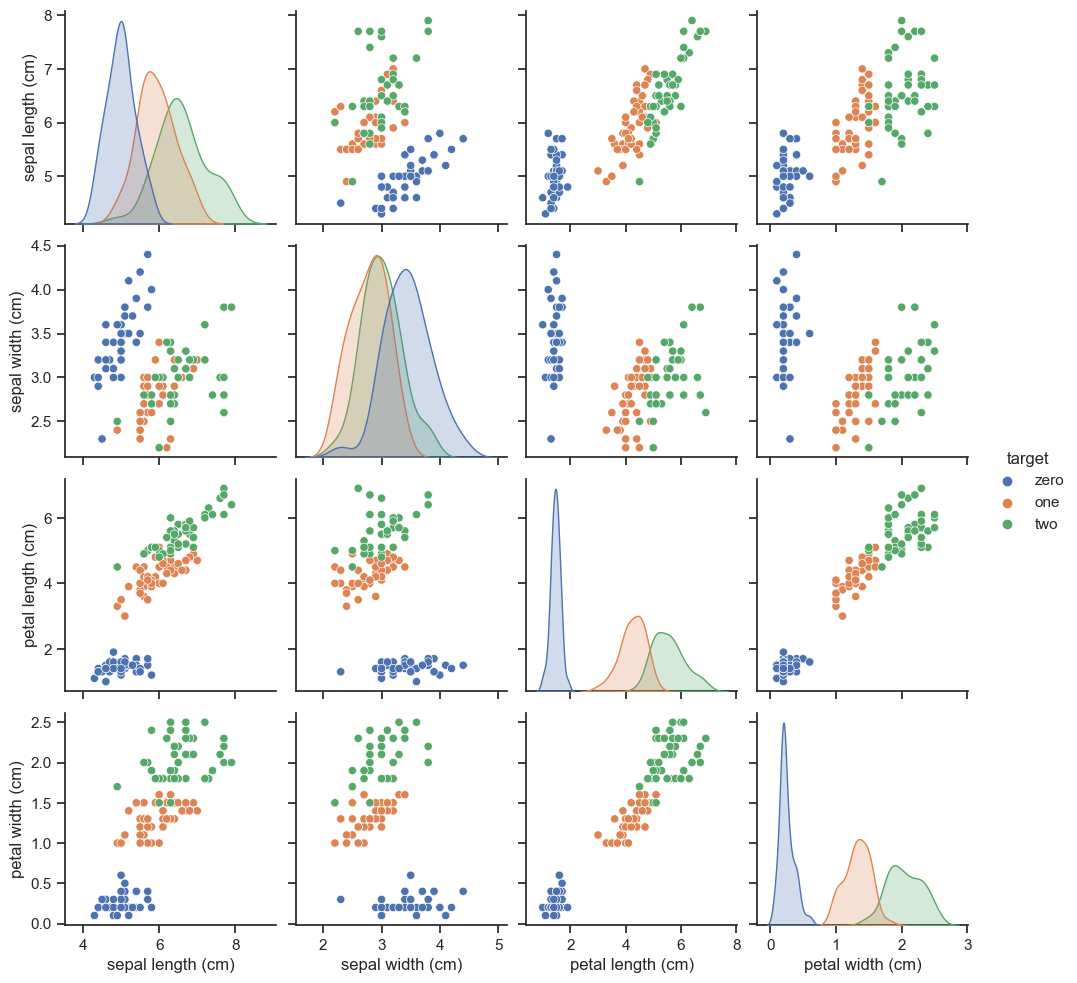

In [39]:
# С помощью параметра "hue" возможна группировка по значениям какого-либо признака.
sns.pairplot(iris_df, hue="target")

## Выводы
Наиболее логично проводить дальнейшее машинное обучение для признака "target" (наиболее ярко выраженный целевой признак).